Nombre: Alexis Leal Mata
Materia: PLN y vision Computacional
Enero 2023

In [39]:
import nltk
import matplotlib.pyplot as plt
import re
import unicodedata
from nltk.corpus import stopwords

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Alexis
[nltk_data]     Leal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to C:\Users\Alexis
[nltk_data]     Leal\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [42]:
stop_words = sorted(stopwords.words('english'))
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [43]:
#Vemos los id de los documentos que contiene movies_reviews
nltk.corpus.movie_reviews.fileids()
#A simple vista parece que solo tenemos neg

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


In [44]:
#Vemos que tenemos dos categorias positiva y negativa
nltk.corpus.movie_reviews.categories()

['neg', 'pos']

In [45]:
#Obtenemos la frecuencia de las palabras
frecuenciaGeneral =  nltk.FreqDist(nltk.corpus.movie_reviews.words())
frecuenciaGeneral

FreqDist({',': 77717, 'the': 76529, '.': 65876, 'a': 38106, 'and': 35576, 'of': 34123, 'to': 31937, "'": 30585, 'is': 25195, 'in': 21822, ...})

In [46]:
#Esta funcion elimina caracteres especiales y acentos
#Fue creada por CHATGP
def remove_special_characters_and_accents(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII')
    return text


In [47]:
categoriaPositiva = nltk.corpus.movie_reviews.words(categories='pos')
print(f"Longitud de categoria positiva antes de la limpieza {len(categoriaPositiva)}")
categoriaNegativas = nltk.corpus.movie_reviews.words(categories='neg')
print(f"Longitud de categoria negativa antes de la limpieza {len(categoriaNegativas)}")

Longitud de categoria positiva antes de la limpieza 832564
Longitud de categoria negativa antes de la limpieza 751256


Limpieza de datos de categoria positiva

In [48]:
def limpiezaPalabras(lista,stopWords):
    sinStopWords = [w for w in lista if not w.lower() in stopWords]
    sincaracteresEspeciales = [remove_special_characters_and_accents(w) for w in sinStopWords]
    listaPalabras = [w for w in sincaracteresEspeciales if w != ""]
    return  listaPalabras

In [49]:
#Codigo de prueba
# Test = ["Alexis","alexis","Leal"]
# len(nltk.FreqDist([w.lower() for w in Test]))

In [50]:
frecuenciaPositiva = nltk.FreqDist([w.lower() for w in limpiezaPalabras(categoriaPositiva,stop_words)])
print(f"Longitud de categoria positiva despues de la limpieza {len(frecuenciaPositiva)}")

Longitud de categoria positiva despues de la limpieza 29750


In [51]:
frecuenciaNegativa = nltk.FreqDist([w.lower() for w in limpiezaPalabras(categoriaNegativas,stop_words)])
print(f"Longitud de categoria negativa despues de la limpieza {len(frecuenciaNegativa)}")

Longitud de categoria negativa despues de la limpieza 27841


In [52]:
print(f"Numero de caracteres categoria positva {frecuenciaPositiva.N()}")
print(f"Numero de caracteres catageria negativa {frecuenciaNegativa.N()}")

Numero de caracteres categoria positva 372286
Numero de caracteres catageria negativa 330613


In [53]:
def funcion_bolsa_palabras(dicwords):
    return {word:1 for word,count in dicwords.items() if count == 1}


In [54]:
# for x,y  in frecuenciaNegativa.items():
#     print(x)
#     print(y)

In [55]:
frecuencia1Pos = funcion_bolsa_palabras(frecuenciaPositiva)
frencuencia1Neg = funcion_bolsa_palabras(frecuenciaNegativa)

In [56]:
print(f"Frencuencia de 1  negativa {frencuencia1Neg} y en total {len(frencuencia1Neg)}")

Frencuencia de 1  negativa {'snag': 1, 'looooot': 1, 'unravel': 1, 'unraveling': 1, 'craziness': 1, 'schnazzy': 1, 'sunken': 1, 'timex': 1, 'indiglo': 1, 'transfers': 1, 'challenger': 1, 'jessalyn': 1, 'gilsig': 1, 'warlord': 1, 'ruber': 1, 'timberland': 1, 'dweller': 1, 'rickles': 1, 'differentiates': 1, 'herc': 1, 'hydra': 1, 'jaleel': 1, 'balki': 1, 'singers': 1, 'seymour': 1, 'dion': 1, 'proliferation': 1, 'inexpensive': 1, 'wavers': 1, 'statistics': 1, 'snapshot': 1, 'gleason': 1, 'guesswork': 1, 'obsesses': 1, 'maryam': 1, 'daylights': 1, 'validity': 1, 'terraformed': 1, 'stagnated': 1, 'napolean': 1, 'millimeter': 1, 'enmeshed': 1, 'americana': 1, 'brutalized': 1, 'unsavory': 1, 'specialized': 1, 'whirs': 1, 'sprockets': 1, 'harrisburg': 1, 'flunky': 1, 'deviants': 1, 'hairs': 1, 'scriptwriters': 1, 'fluttered': 1, 'paves': 1, 'cacophonous': 1, 'simultaneous': 1, 'veterinary': 1, 'obstetrics': 1, 'mispronounces': 1, 'yakov': 1, 'smirnov': 1, 'volvo': 1, 'unauthentic': 1, 'zombif

In [57]:
print(f"Frencuencia de 1  positiva {frecuencia1Pos} y en total {len(frecuencia1Pos)}")

Frencuencia de 1  positiva {'watchmen': 1, 'researched': 1, 'footnotes': 1, 'riddle': 1, 'sooty': 1, 'whores': 1, 'surgical': 1, 'godley': 1, 'absinthe': 1, 'briefed': 1, 'cloaking': 1, 'whistling': 1, 'stonecutters': 1, 'guttenberg': 1, 'dreariness': 1, 'childs': 1, 'prague': 1, 'ians': 1, 'dalmatians': 1, 'cringed': 1, 'stinker': 1, 'achiever': 1, 'rooney': 1, 'gymnasium': 1, 'tonal': 1, 'mushy': 1, 'foreseeable': 1, 'dum': 1, 'relinquishes': 1, 'amity': 1, 'beaches': 1, 'relents': 1, 'crusty': 1, 'dethroned': 1, 'dousing': 1, 'apprenticeship': 1, 'kravitz': 1, 'ahab': 1, 'masochism': 1, 'devoured': 1, 'sinch': 1, 'writihing': 1, 'chomped': 1, 'overruns': 1, 'allocate': 1, 'linebackers': 1, 'safeties': 1, 'herb': 1, 'madrid': 1, 'carriages': 1, 'rockies': 1, 'hairstylist': 1, 'sympathizers': 1, 'misuse': 1, 'kevlar': 1, 'hamster': 1, 'crates': 1, 'scorpions': 1, 'hitchhiking': 1, 'kazdan': 1, 'ousted': 1, 'aides': 1, 'guaranteeing': 1, 'dismembering': 1, 'hatchets': 1, 'saws': 1, 'bo

In [58]:
top20Positivas =frecuenciaPositiva.most_common(20)

In [59]:
top20Negativas =frecuenciaNegativa.most_common(20)

In [60]:
#Creamos un diccionario de las top 20 de la categoria por que este nos devuelve una tupla
dicPos = {}
for x,y in top20Positivas:
    dicPos[x] = y

In [61]:
dicNeg = {}
for x,y in top20Negativas:
    dicNeg[x] = y

In [62]:
import seaborn as sn
import  pandas as pd

Graficamos el top 20 de cada categoria

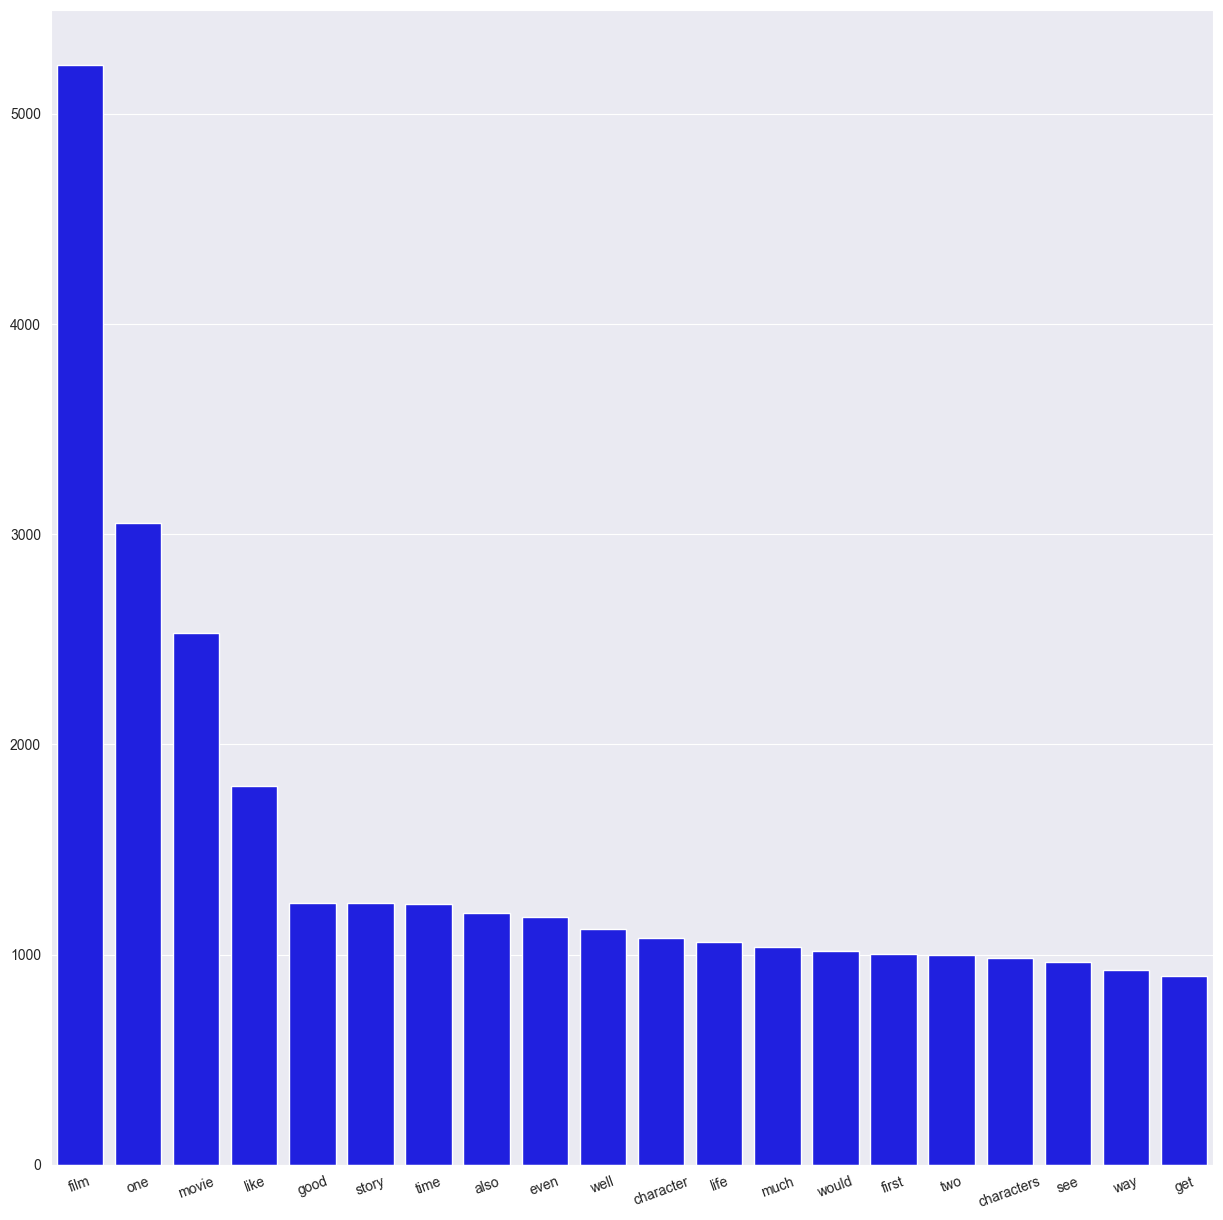

In [63]:
#Cremos una data frame con la libreria pandas
frec_dist = pd.Series(dicPos)
fig, ax = plt.subplots(figsize=(15,15))
grafica = sn.barplot(x=frec_dist.keys(), y=frec_dist.values, ax=ax,color='blue')
plt.xticks(rotation=20);

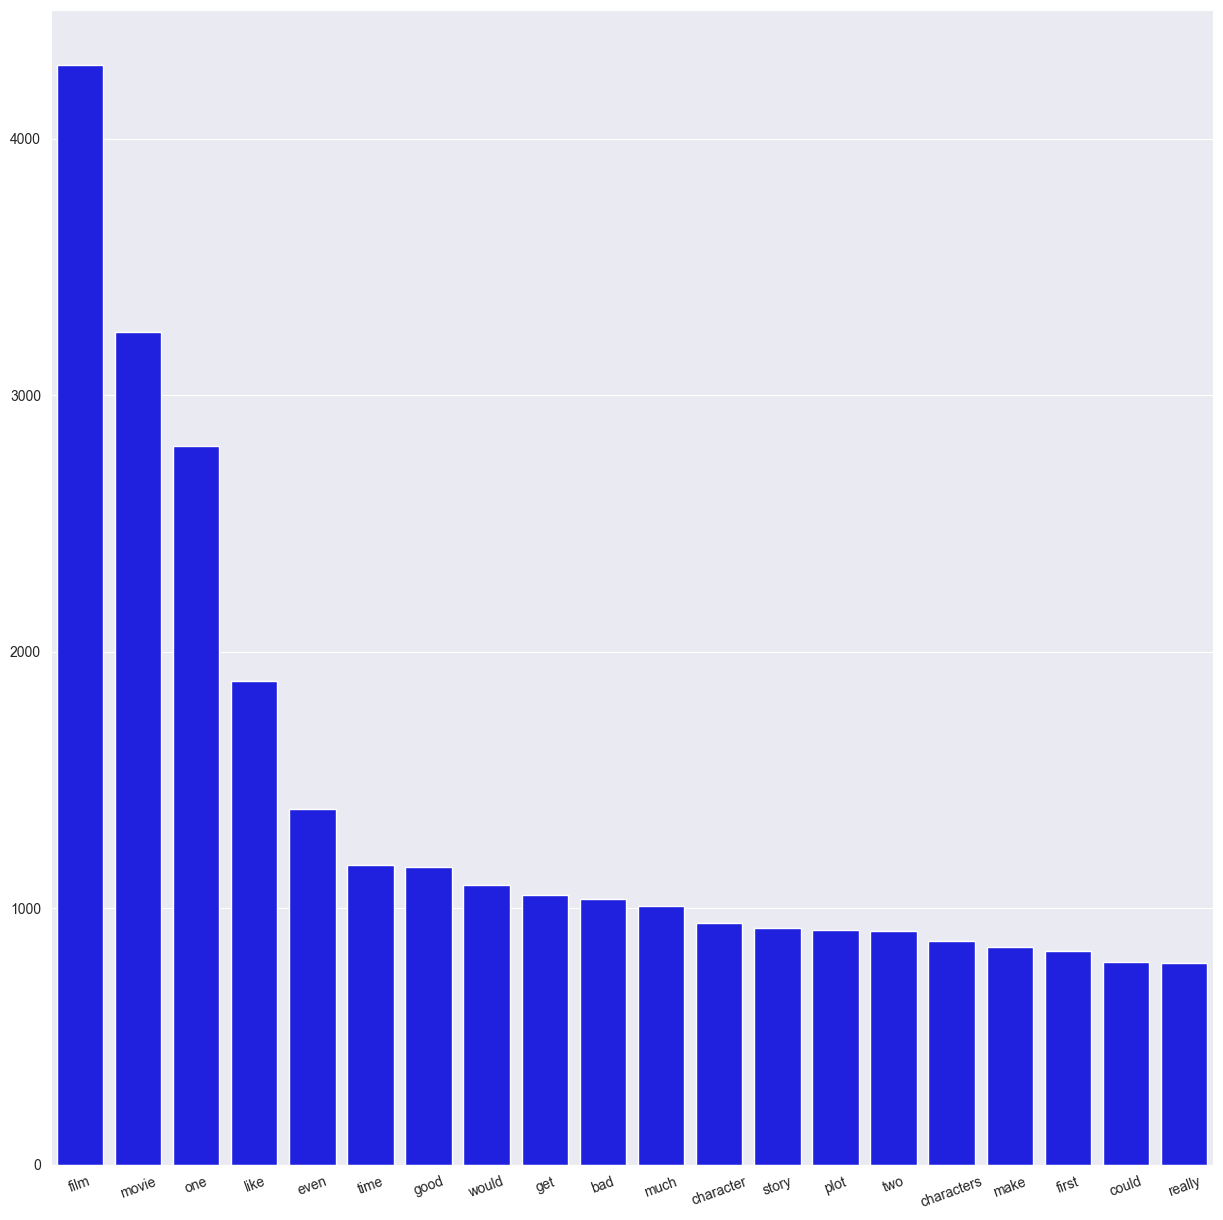

In [64]:
frec_distN = pd.Series(dicNeg)
fig, ax = plt.subplots(figsize=(15,15))
grafica = sn.barplot(x=frec_distN.keys(), y=frec_distN.values, ax=ax,color='blue')
plt.xticks(rotation=20);